#### sympy Transfer Function

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import matplotlib.pyplot as plt
# %matplotlib inline
%config InlineBackend.figure_format = 'retina'
# svg retina

import sympy as sym
from sympy.physics.control.lti import TransferFunction

from sympy.physics.control.control_plots import pole_zero_plot
# from sympy.physics.control.control_plots import step_response_plot
# from sympy.physics.control.control_plots import step_response_numerical_data

from sympy.physics.control.control_plots import bode_plot
# from sympy.physics.control.control_plots import bode_phase_numerical_data
# from sympy.physics.control.control_plots import bode_magnitude_numerical_data
from sympy.physics.control.control_plots import impulse_response_plot
from sympy.physics.control.control_plots import step_response_plot
from sympy.physics.control.control_plots import ramp_response_plot
# from sympy.physics.control.control_plots import ramp_response_numerical_data
from sympy.abc import s
import numpy as np
m_s, B, B_s,K = sym.symbols('m_s B B_s K')

B_val=2000
B_s_val=2000
K_val=32366
m_s_val=563

### Transfer Function build up through polynorm

In [2]:
tf = (B*s + K)/(m_s*s**2 + B*s + K)
tf
sym.numer(tf)
sym.denom(tf)

(B*s + K)/(B*s + K + m_s*s**2)

B*s + K

B*s + K + m_s*s**2

In [3]:
num = sym.poly(sym.numer(tf), s)
num
num.all_coeffs()
den = sym.poly(sym.denom(tf), s)
den
den.all_coeffs()

Poly(B*s + K, s, domain='ZZ[B,K]')

[B, K]

Poly(m_s*s**2 + B*s + K, s, domain='ZZ[B,K,m_s]')

[m_s, B, K]

#### Put actual data into the symbol equation

In [4]:
tf=tf.subs({B: B_val, K: K_val, m_s: m_s_val})
tf

(2000*s + 32366)/(563*s**2 + 2000*s + 32366)

#### Collect num den coeff from polynom

In [5]:
num = sym.poly(sym.numer(tf), s)
num
num.all_coeffs()
den = sym.poly(sym.denom(tf), s)
den
den.all_coeffs()

Poly(2000*s + 32366, s, domain='ZZ')

[2000, 32366]

Poly(563*s**2 + 2000*s + 32366, s, domain='ZZ')

[563, 2000, 32366]

### sympy TransferFunction build up  Transfer Function 

In [6]:
tf1 = TransferFunction(B*s + K, m_s*s**2 + B*s + K, s)
tf1

tf1_zeros=tf1.zeros()
len(tf1_zeros)
tf1_zeros[0]

tf1_poles=tf1.poles()
len(tf1_poles)
tf1_poles[0]
tf1_poles[1]

TransferFunction(B*s + K, B*s + K + m_s*s**2, s)

1

-K/B

2

-B/(2*m_s) - sqrt(B**2 - 4*K*m_s)/(2*m_s)

-B/(2*m_s) + sqrt(B**2 - 4*K*m_s)/(2*m_s)

#### Collect num den coeff from polynom

In [7]:
# sym.numer(tf1)
# tf1.num
num=sym.poly(tf1.num, s)
num.all_coeffs()
den=sym.poly(tf1.den, s)
den.all_coeffs()

[B, K]

[m_s, B, K]

#### Put actual data into the symbol equation

In [8]:
# ms=563Kg 
# spring stiffness K	32,366 N/m
# Passive damper coefficient (B)	2000 Ns/m

tf1
tf1_1=tf1.subs({B: B_val, K: K_val, m_s: m_s_val})
tf1_1

TransferFunction(B*s + K, B*s + K + m_s*s**2, s)

TransferFunction(2000*s + 32366, 563*s**2 + 2000*s + 32366, s)

#### Collect num den coeff

In [9]:
num=sym.poly(tf1_1.num, s)
num_coeff=num.all_coeffs()
num_coeff
den=sym.poly(tf1_1.den, s)
den_coeff=den.all_coeffs()
den_coeff

[2000, 32366]

[563, 2000, 32366]

#### Plot step input response and other

tf1_1 zeros is  [-16183/1000]
tf1_1 poles is  [-1000/563 - 9*sqrt(212618)*I/563, -1000/563 + 9*sqrt(212618)*I/563]


<module 'matplotlib.pyplot' from 'C:\\Users\\j4000774\\AppData\\Roaming\\Python\\Python310\\site-packages\\matplotlib\\pyplot.py'>

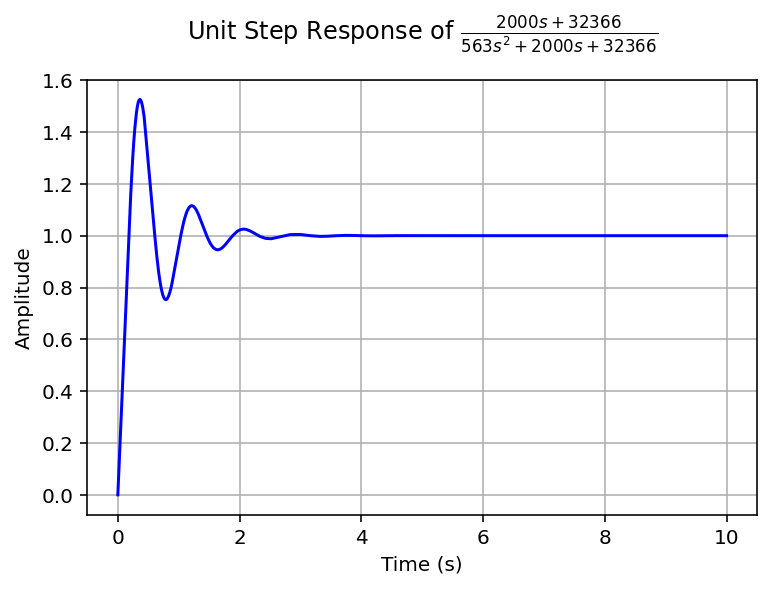

<module 'matplotlib.pyplot' from 'C:\\Users\\j4000774\\AppData\\Roaming\\Python\\Python310\\site-packages\\matplotlib\\pyplot.py'>

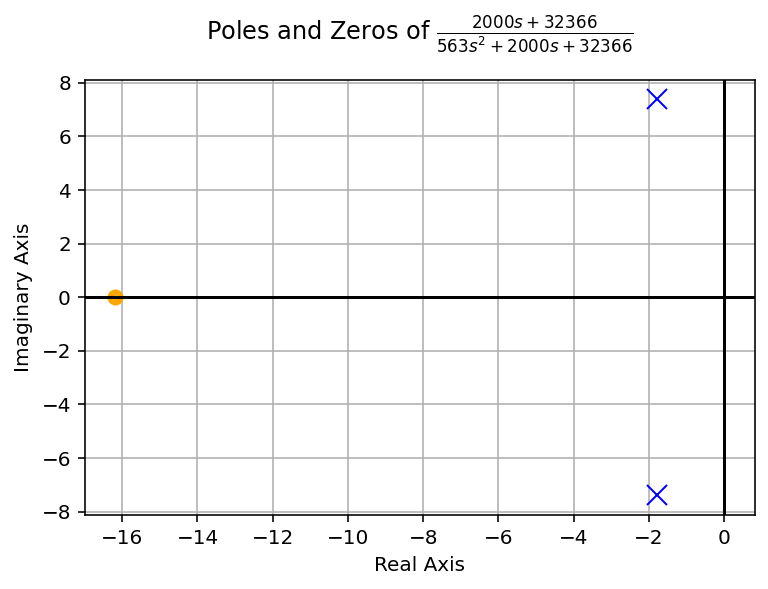

<module 'matplotlib.pyplot' from 'C:\\Users\\j4000774\\AppData\\Roaming\\Python\\Python310\\site-packages\\matplotlib\\pyplot.py'>

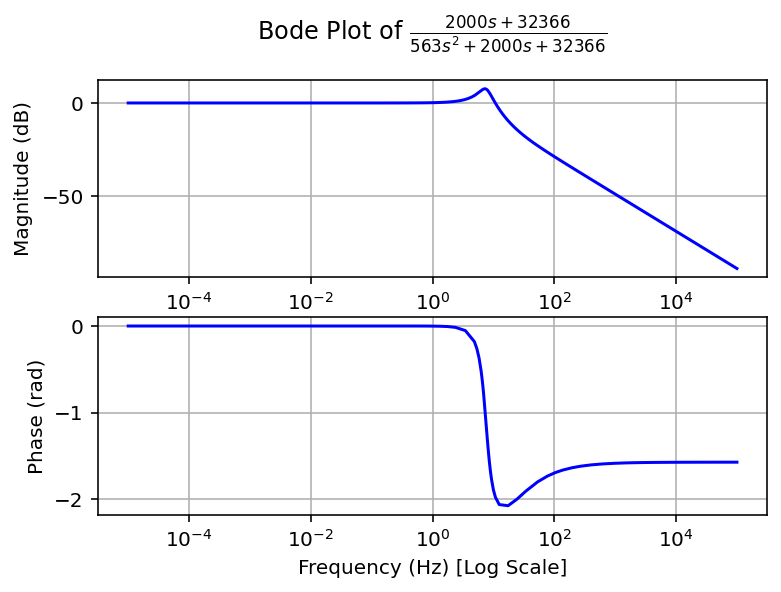

In [10]:
tf1_1_zeros=tf1_1.zeros()
print("tf1_1 zeros is ",tf1_1_zeros)
tf1_1_poles=tf1_1.poles()
print("tf1_1 poles is ",tf1_1_poles)
# Plot Step reponse 
step_response_plot(tf1_1,show=False)
plt.savefig("tf1_1_Step_Reponse.png", dpi=500, bbox_inches='tight')
plt.show()
# Plot Zero Pole reponse 
pole_zero_plot(tf1_1,show=False)
plt.savefig("tf1_1_Zero_Pole.png", dpi=500, bbox_inches='tight')
plt.show()
# Plot Bode
bode_plot(tf1_1,show=False)
plt.savefig("tf1_1_bode.png", dpi=500, bbox_inches='tight')
plt.show()


### sympy TransferFunction build up  Transfer Function 

## Control build up Transfer Function

In [11]:
import control as ct
# currently num and den is a list of object,shall change it to float
num=np.asarray(num_coeff)
num=num.astype(np.float64)
den=np.asarray(den_coeff)
den=den.astype(np.float64)

tf=ct.tf(num.T,den)
tf


TransferFunction(array([ 2000., 32366.]), array([  563.,  2000., 32366.]))

#### Zero pole Plot

array([-1.77619893+7.37113099j, -1.77619893-7.37113099j])

array([-16.183+0.j])

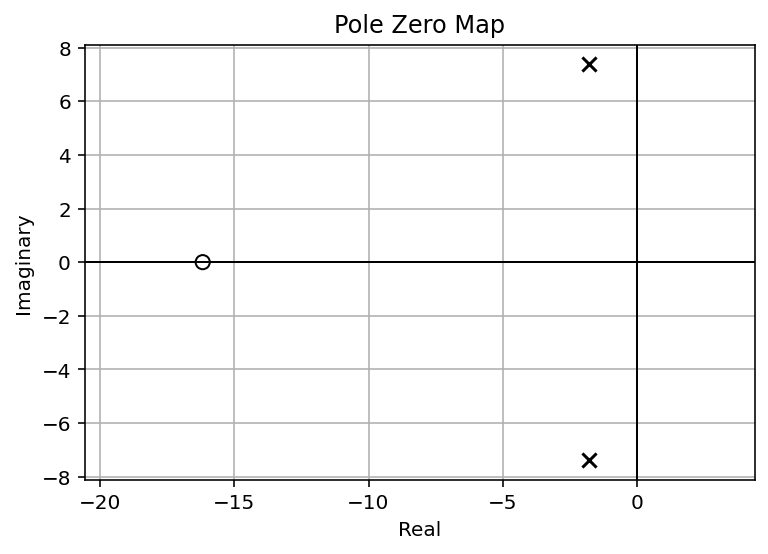

In [12]:
poles,zeros=ct.pzmap(tf)
poles
zeros
plt.grid()
# plt.savefig("tf_bode.png", dpi=500, bbox_inches='tight')
plt.show()



#### root locus Plot

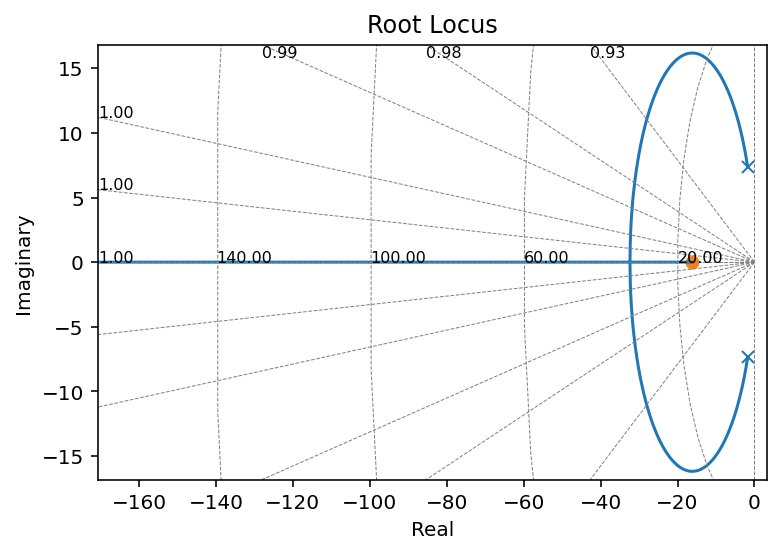

In [13]:
roots ,gains=ct.root_locus(tf)
# plt.savefig("root_locus.png", dpi=500, bbox_inches='tight')
plt.show()


#### root locus Plot

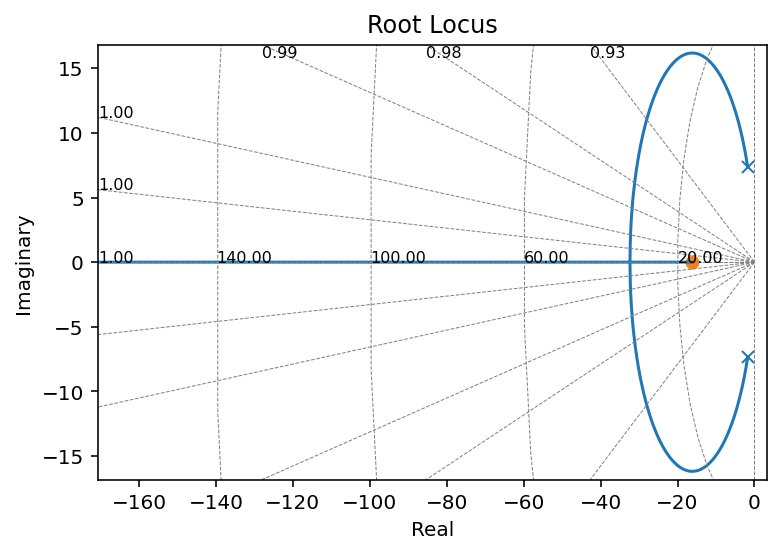

In [14]:
roots ,gains=ct.root_locus(tf)
# plt.savefig("root_locus.png", dpi=500, bbox_inches='tight')
plt.show()


#### Frequency domain plotting

##### bode_plot

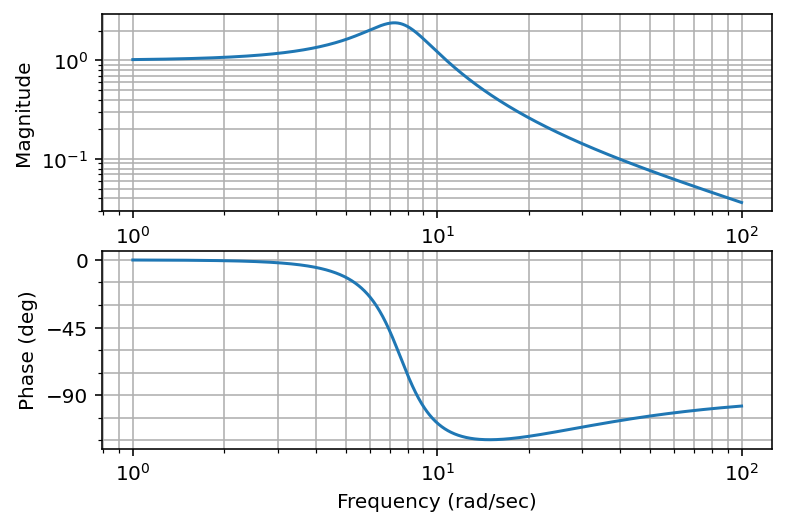

In [15]:
mag ,phase,omega=ct.bode_plot(tf)
# plt.show

##### Nyquist plot with a describing function


In [16]:
# ct.describing_function_plot(tf)
    # H, F, A[, omega, ...])

##### Nyquist plot 

0

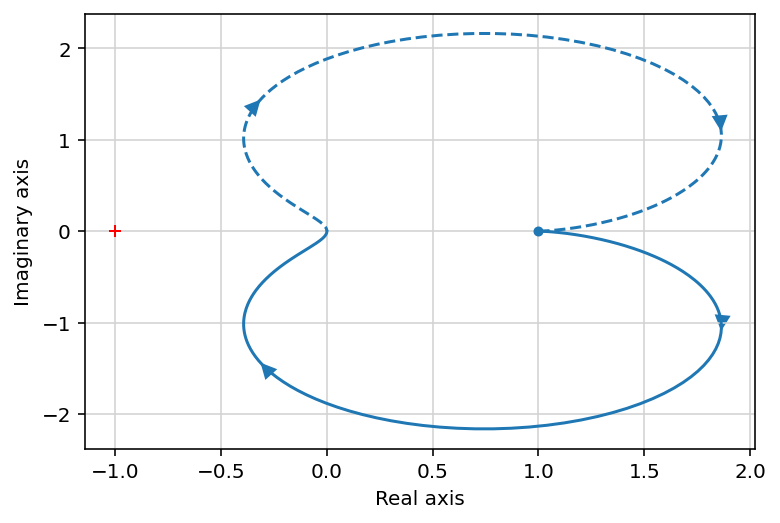

In [17]:
count = ct.nyquist_plot(tf)
count

##### Nichols plot for a system

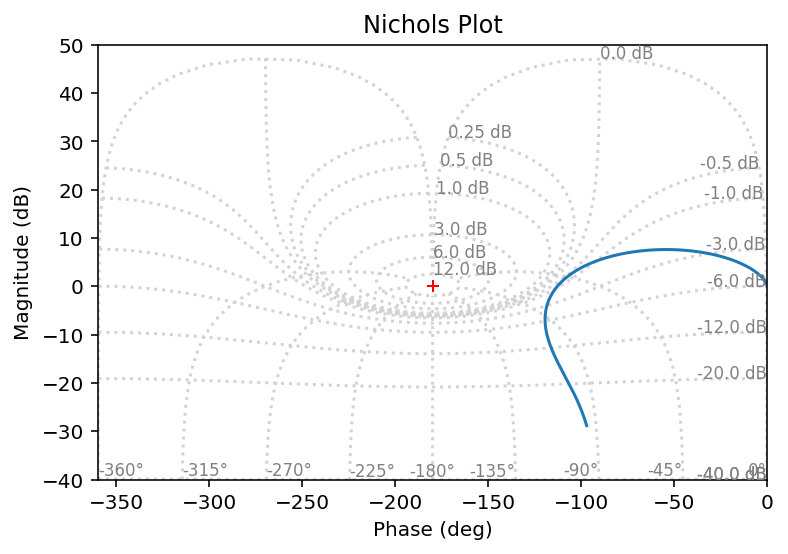

In [18]:
ct.nichols_plot(tf)

# Nichols chart grid.
# nichols_grid([cl_mags, cl_phases, ...])


## Scipy build up Transfer Function

In [19]:
from scipy import signal
tf=(s*s**2+3*s+1)/(4*s**3+3*s**2+s+2)
tf
num = sym.poly(sym.numer(tf), s)
num
num_coeff=num.all_coeffs()
den = sym.poly(sym.denom(tf), s)
den
den_coeff=den.all_coeffs()
# currently num_coeff and den_coeff data type is object,we shall change it to float
num_coeff=np.asarray(num_coeff)
num_coeff=num_coeff.astype(np.float64)
den_coeff=np.asarray(den_coeff)
den_coeff=den_coeff.astype(np.float64)

num_coeff
den_coeff
tf=signal.lti(num_coeff,den_coeff)
tf

(s**3 + 3*s + 1)/(4*s**3 + 3*s**2 + s + 2)

Poly(s**3 + 3*s + 1, s, domain='ZZ')

Poly(4*s**3 + 3*s**2 + s + 2, s, domain='ZZ')

array([1., 0., 3., 1.])

array([4., 3., 1., 2.])

TransferFunctionContinuous(
array([0.25, 0.  , 0.75, 0.25]),
array([1.  , 0.75, 0.25, 0.5 ]),
dt: None
)

### Plot transfer function

#### Plot transfer function

#### Simulate with input

lsim(system, U, T[, X0, interp])

Simulate output of a continuous-time linear system.

lsim2(system[, U, T, X0])

Simulate output of a continuous-time linear system, by using the ODE solver scipy.integrate.odeint.

#### Impulse response of continuous-time system

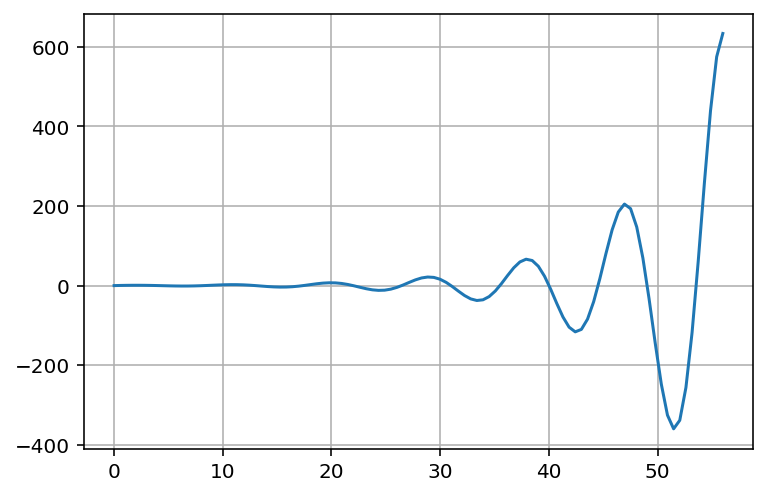

In [20]:
t, y = signal.impulse(tf)
plt.plot(t,y)
plt.grid()

#### Step response of continuous-time system

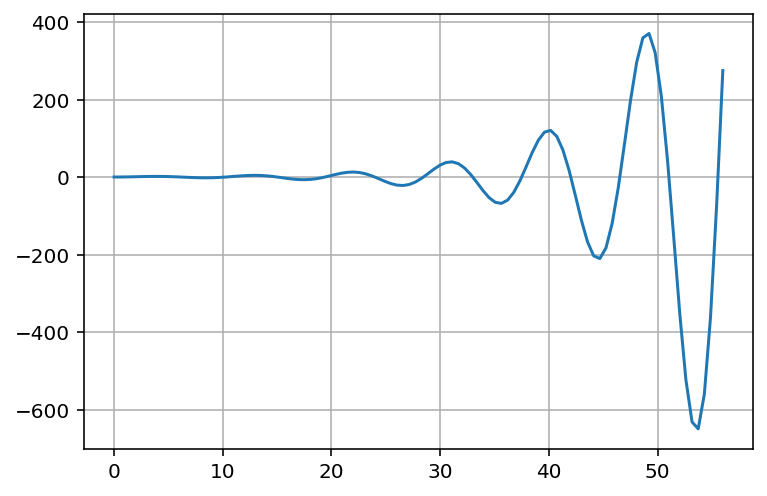

In [21]:
t,y=signal.step(tf)
plt.plot(t,y)
plt.grid()

#### frequency response of a continuous-time system

C:\Users\j4000774\AppData\Roaming\Python\Python310\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


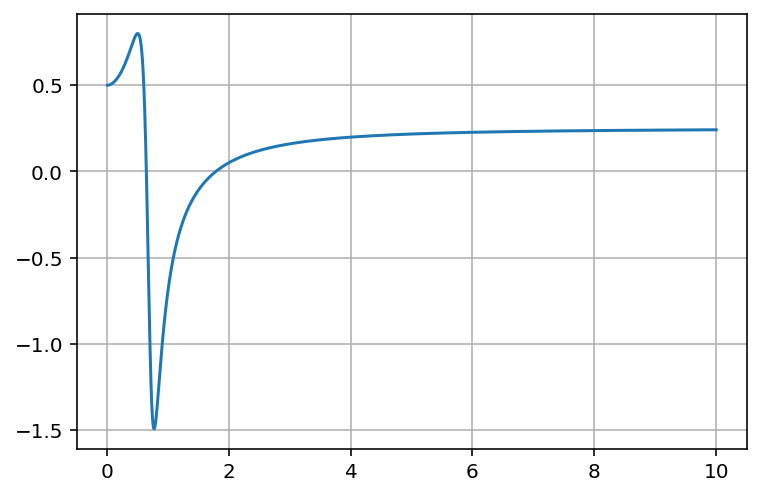

In [22]:
t,y=signal.freqresp(tf)
plt.plot(t,y)
plt.grid()

#### Bode Plot

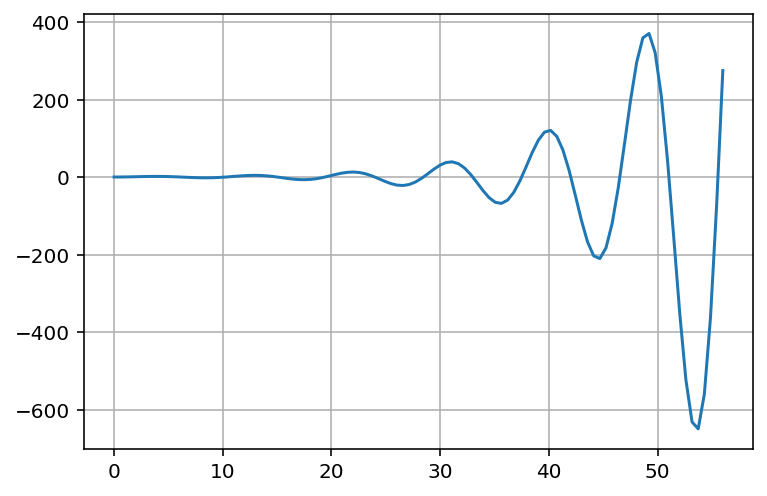

In [23]:
t,y=signal.step(tf)
plt.plot(t,y)
plt.grid()



freqresp(system[, w, n])

Calculate the .

bode(system[, w, n])

Calculate Bode magnitude and phase data of a continuous-time system.